In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk # Natural Language Toolkit
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rico\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Rico\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Rico\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Rico\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Rico\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', index_col='Unnamed: 0')
print(df.shape)
df = df.head(1500)
print(df.shape)

(23486, 10)
(1500, 10)


In [3]:
df.head(3)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses


Let's review our data to see what it looks like

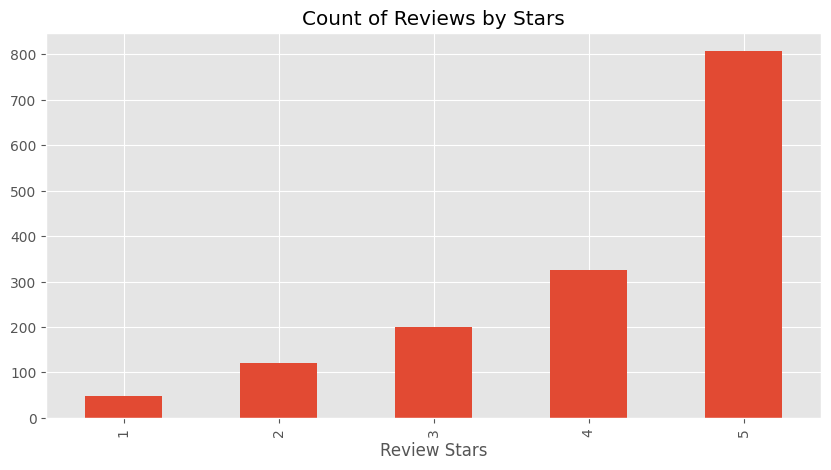

In [4]:
ax = df['Rating'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews by Stars', figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

The data is heavily unbalanced towards 5 stars reviews.

In [5]:
example = df['Review Text'][50]
print(example)

This is a cute top that can transition easily from summer to fall. it fits well, nice print and it's comfortable. i tried this on in the store, but did not purchase it because the color washed me out. this is not the best color for a blonde. would look much better on a brunette. if this was in a different color i most likely would have purchased it.


Splitting text by words

In [6]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This',
 'is',
 'a',
 'cute',
 'top',
 'that',
 'can',
 'transition',
 'easily',
 'from']

Now we will determine the part of speech of each word we received earlier. To find out exactly what the abbreviations mean, see the following link https://www.ibm.com/docs/en/wca/3.5.0?topic=analytics-part-speech-tag-sets (POS tagging)

In [7]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('cute', 'JJ'),
 ('top', 'NN'),
 ('that', 'WDT'),
 ('can', 'MD'),
 ('transition', 'VB'),
 ('easily', 'RB'),
 ('from', 'IN')]

Group the text by chunks using tokens from above.

In [8]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  is/VBZ
  a/DT
  cute/JJ
  top/NN
  that/WDT
  can/MD
  transition/VB
  easily/RB
  from/IN
  summer/NN
  to/TO
  fall/VB
  ./.
  it/PRP
  fits/VBZ
  well/RB
  ,/,
  nice/JJ
  print/NN
  and/CC
  it/PRP
  's/VBZ
  comfortable/JJ
  ./.
  i/VB
  tried/VBD
  this/DT
  on/IN
  in/IN
  the/DT
  store/NN
  ,/,
  but/CC
  did/VBD
  not/RB
  purchase/VB
  it/PRP
  because/IN
  the/DT
  color/NN
  washed/VBD
  me/PRP
  out/RP
  ./.
  this/DT
  is/VBZ
  not/RB
  the/DT
  best/JJS
  color/NN
  for/IN
  a/DT
  blonde/NN
  ./.
  would/MD
  look/VB
  much/RB
  better/RBR
  on/IN
  a/DT
  brunette/NN
  ./.
  if/IN
  this/DT
  was/VBD
  in/IN
  a/DT
  different/JJ
  color/NN
  i/NN
  most/RBS
  likely/RB
  would/MD
  have/VB
  purchased/VBN
  it/PRP
  ./.)


#### **V**alence **A**ware **D**ictionary and s**E**ntiment **R**easoner (VADER)

**VADER** is an NLTK module that provides sentiment scores based on the words used. Important note: VADER only looks at word valence, it does not take word association in the sentence at all. Also it omits every 'unimportant' word like connectors, etc. (for example 'the', 'and', ...).

In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm # to time iterations

sia = SentimentIntensityAnalyzer()

Sentiment Intensity Analyzer is a module, that returns scores for the sentence (text) based on its sentiment. It returns compound value for overall mood of the text in the range between -1 and 1, where -1 is negative and 1 is positive mood.

In [10]:
sia.polarity_scores('What a cruel word')

{'neg': 0.655, 'neu': 0.345, 'pos': 0.0, 'compound': -0.5859}

In [11]:
sia.polarity_scores('Bitter sweet symphony')

{'neg': 0.412, 'neu': 0.147, 'pos': 0.441, 'compound': 0.0516}

Remember our example about dress that can transition from summer to fall? Let's test it with SIA and see what it thinks about the mood of the review.

In [12]:
sia.polarity_scores(example)

{'neg': 0.061, 'neu': 0.742, 'pos': 0.196, 'compound': 0.7182}

Now let's run SIA over the entire dataset to get scores for all comments.

In [13]:
results = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = str(row['Review Text'])
    results[i] = sia.polarity_scores(text)

  0%|          | 0/1500 [00:00<?, ?it/s]

We merge our original dataset with the result of SIA's analysis to make it easier to work with and interpret.

In [14]:
vaders = pd.DataFrame(results).T
vaders = pd.merge(vaders, df, left_index=True, right_index=True)

In [15]:
vaders.head(3)

,neg,neu,pos,compound,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0.000,0.272,0.728,0.8932,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,0.000,0.664,0.336,0.9729,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,0.027,0.792,0.181,0.9427,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses


Plotting the results of SIA will allow us to visually assess the adequacy of the created model.

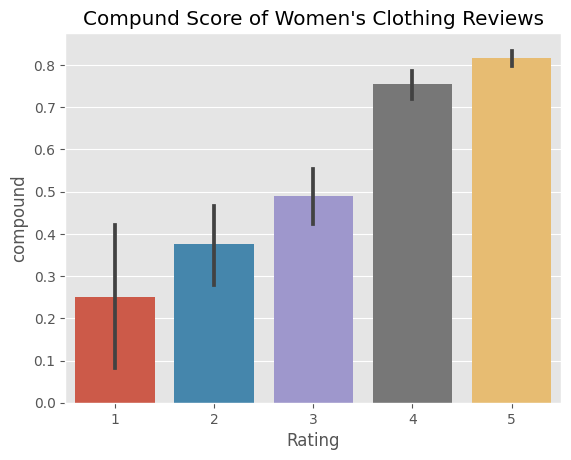

In [16]:
ax = sns.barplot(data=vaders, x='Rating', y='compound')
ax.set_title('Compund Score of Women\'s Clothing Reviews')
plt.show()

We see that the results are indeed getting more negative as we approach lower rating.

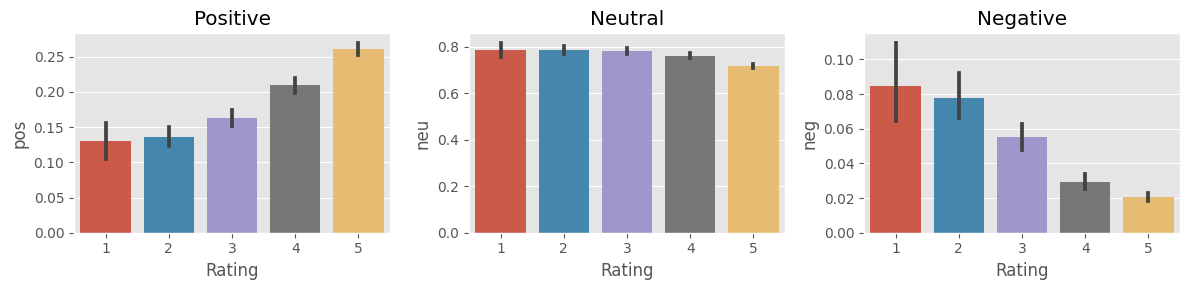

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

#### Roberta Pretrained Model

**R**obustly **O**ptimized **BERT** Pretraining Approach is a variant of the **BERT** (**B**idirectional **E**ncoder **R**epresentations from **T**ransformers) model, which was developed by researchers at Facebook AI. Like BERT, RoBERTa is a transformer-based language model that uses self-attention to process input sequences and generate contextualized representations of words in a sentence.

One key difference between RoBERTa and BERT is that RoBERTa was trained on a much larger dataset and using a more effective training procedure. In particular, RoBERTa was trained on a dataset of 160GB of text, which is more than 10 times larger than the dataset used to train BERT. Additionally, RoBERTa uses a dynamic masking technique during training that helps the model learn more robust and generalizable representations of words.

In [18]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

We are using RoBERTa trained on ~58M tweets and finetuned for sentiment analysis with the TweetEval benchmark.

In [19]:
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Let's compare RoBERTa scores on example text with VADER.

In [20]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
scores_dict

{'roberta_neg': 0.20351768,
 'roberta_neu': 0.35858542,
 'roberta_pos': 0.43789697}

In [21]:
sia.polarity_scores(example)

{'neg': 0.061, 'neu': 0.742, 'pos': 0.196, 'compound': 0.7182}

Making a function printing polarity scores seems like a good idea since potentially we may want to print the score more than one time.

In [22]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

Using roberta and wader to analyze the whole dataset.

In [23]:
results = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = str(row['Review Text'])
        vader_res = sia.polarity_scores(text)
        vader_res_rename = {}
        for k, v in vader_res.items():
            vader_res_rename[f"vader_{k}"] = v
        roberta_res = polarity_scores_roberta(text)
        results[i] = {**vader_res_rename, **roberta_res}
    except RuntimeError:
        print(f'Broke on iteration {i}')

  0%|          | 0/1500 [00:00<?, ?it/s]

Merge with original dataframe to get the whole picture.

In [24]:
df_res = pd.DataFrame(results).T
df_res = pd.merge(df_res, df, left_index=True, right_index=True)

In [25]:
df_res.head(3)

,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0.000,0.272,0.728,0.8932,0.002245,0.010576,0.987180,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,0.000,0.664,0.336,0.9729,0.001609,0.007436,0.990955,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,0.027,0.792,0.181,0.9427,0.366803,0.380140,0.253057,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses


Now we can plot both models' sentiment analisys to compare them and look for useful insights.

g:\VSCode\.venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


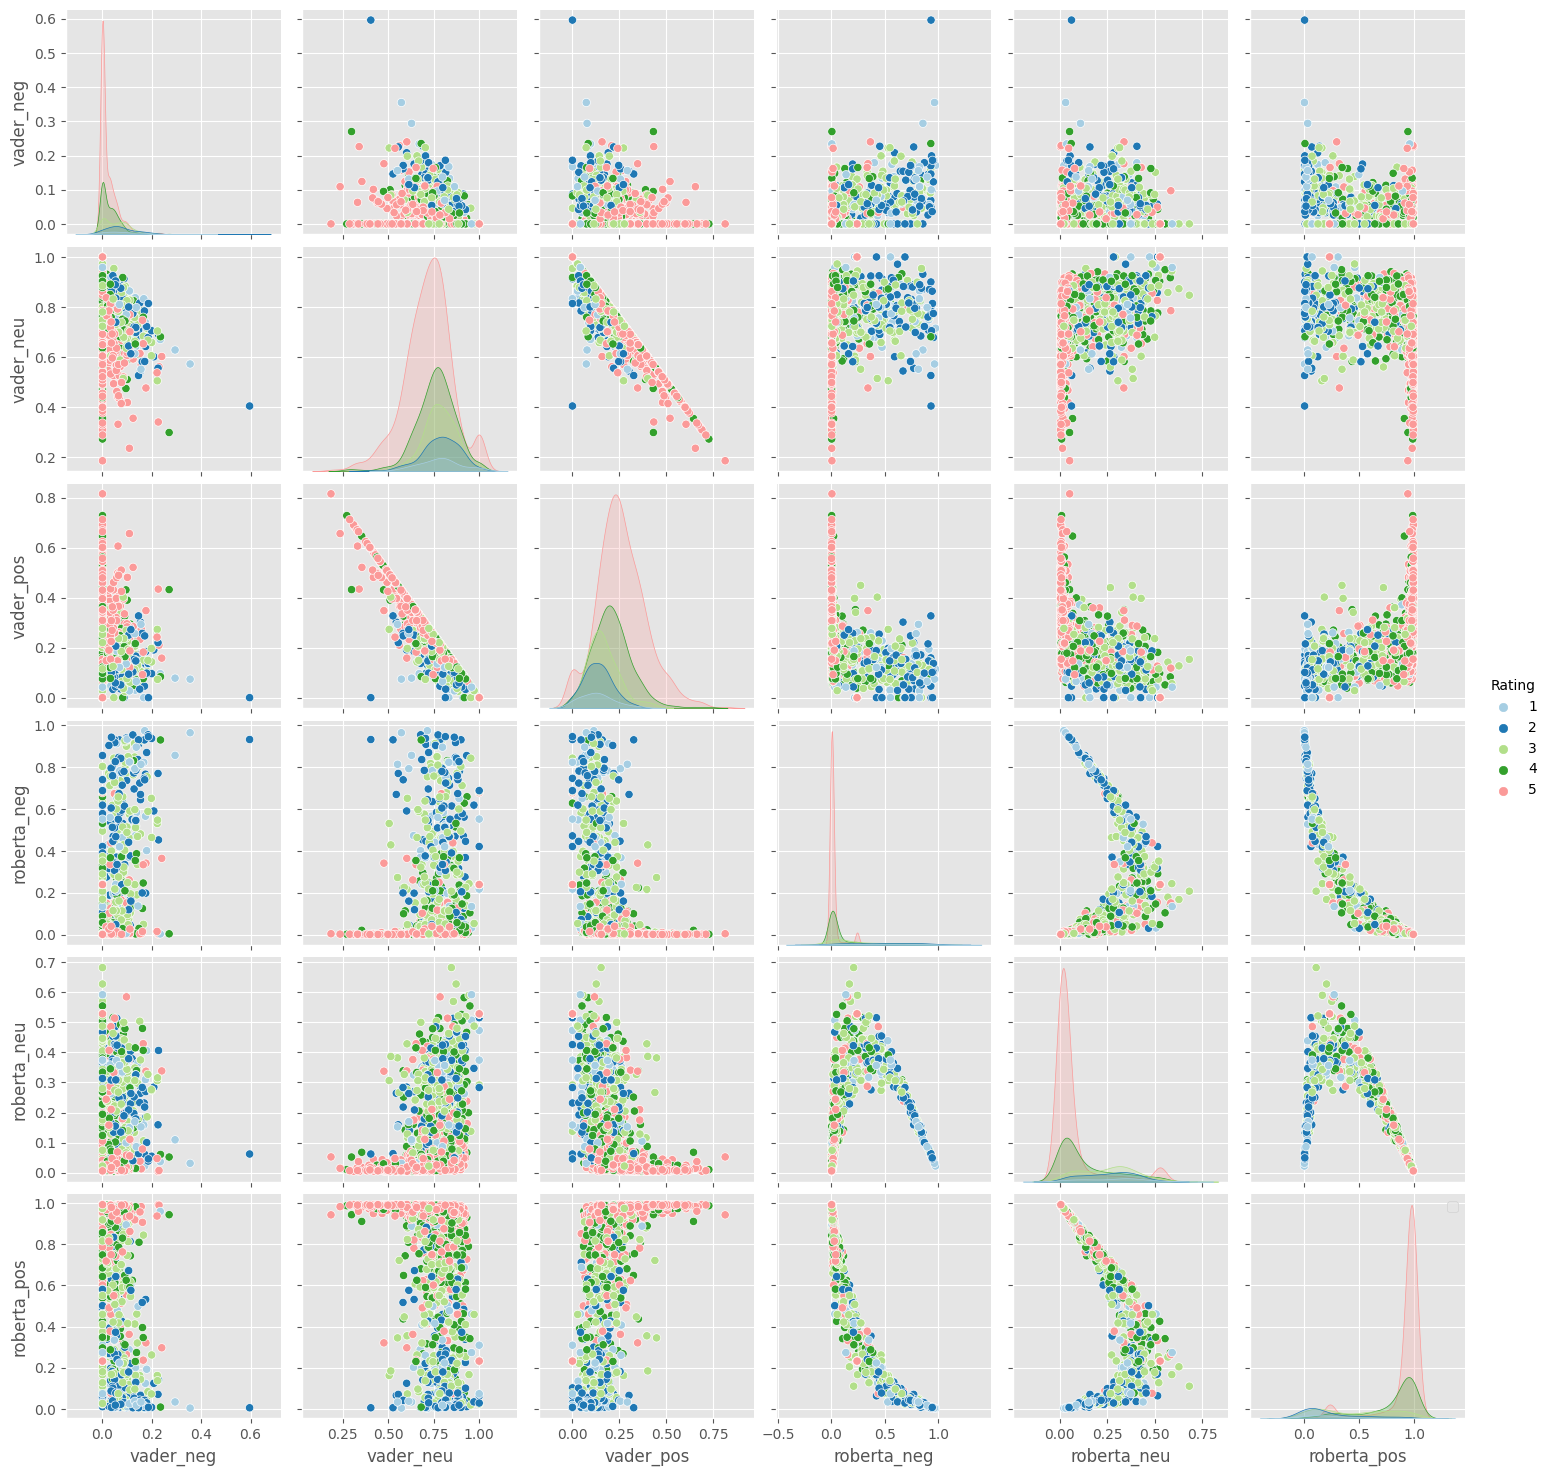

In [26]:
vars = ['vader_neg', 'vader_neu', 'vader_pos', 'roberta_neg', 'roberta_neu', 'roberta_pos']
sns.pairplot(data=df_res, vars=vars, hue='Rating', palette='Paired')
plt.legend()
plt.show();

There are examples of 1 star review with positive sentiment. Let's look at them:

In [27]:
df_res.loc[df_res['Rating'] == 1].sort_values(by='roberta_pos', ascending=False)['Review Text'].values[0]

"I was very excited to order this top in red xs. so cute, but it was huge, shapeless and support thin! it had to go back. i should've looked at other reviews."

In [28]:
df_res.loc[df_res['Rating'] == 1].sort_values(by='vader_pos', ascending=False)['Review Text'].values[0]

'This top looked super cute online but when it came it was super short and boxy. looked like a tent on me. this one went back the same day it came!'

And some negative sentiments in 5 star reviews:

In [29]:
df_res.loc[df_res['Rating'] == 5].sort_values(by='roberta_neg', ascending=False)['Review Text'].values[0]

'Unusual color. expensive even on sale.'

In [30]:
df_res.loc[df_res['Rating'] == 5].sort_values(by='vader_neg', ascending=False)['Review Text'].values[0]

'Loved the green color, the cut is super flattering, but alas, i do need hte petite, ti was a bit long and i looked a little lost. unfrotuantely, the color is sold out in petite :-('